# Regression Task 

In [63]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [64]:
df = pd.read_csv('AMZN.csv', sep = ',')

import datetime
df['Date'] =  pd.to_datetime(df['Date'])

In [65]:
#Check for null values
a = pd.DataFrame(df[['Date', 'Adj Close']].isnull().sum())
a['# of null values'] = a[0]
b = a[['# of null values']]

#Display original data shape
print('Shape of Dataset:')
print('# of Rows, Columns: ',df[['Date', 'Adj Close']].shape)
b.head()

Shape of Dataset:
# of Rows, Columns:  (5529, 2)


,# of null values
Date,0
Adj Close,0


In [66]:
time = df.index.to_numpy(dtype = int)
date = df['Date'].copy().to_numpy(dtype = 'datetime64[ns]')
price = df['Adj Close'].copy().to_numpy(dtype = float)

## 1. Create a time series of the data provided.

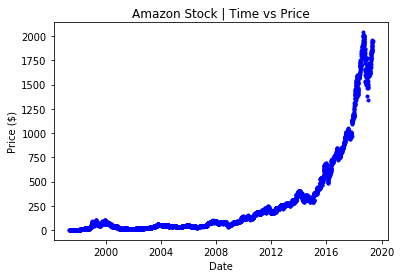

In [67]:
plt.scatter(date, price, color = 'blue', label = 'Actual Price', marker = '.')
plt.title('Amazon Stock | Time vs Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

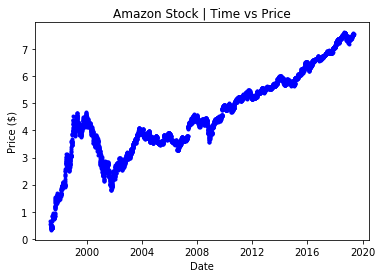

In [68]:
#Since the data seems to be exponential we will transform "Adj Close" 

plt.scatter(date, np.log(price) , color = 'blue', label = 'Actual Price', marker = '.')
plt.title('Amazon Stock | Time vs Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

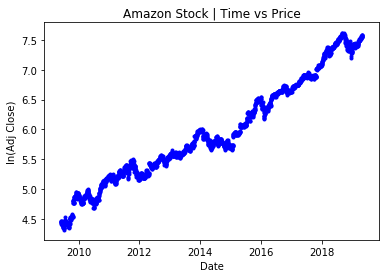

In [69]:
#Selected Data 

plt.scatter(date[-2500:], np.log(price[-2500:]) , color = 'blue', label = 'Actual Price', marker = '.')
plt.title('Amazon Stock | Time vs Price')
plt.xlabel('Date')
plt.ylabel('ln(Adj Close)')
plt.show()

## 2. Create a statistical summary of the data set

In [70]:
df.describe()

,Open,High,Low,Close,Adj Close
count,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,277.799880,280.950590,274.278571,277.765295,277.765295
std,431.384943,435.401154,426.433643,431.130107,431.130107
min,1.406250,1.447917,1.312500,1.395833,1.395833
25%,36.680000,37.349998,36.009998,36.650002,36.650002
50%,77.937500,79.750000,76.290001,78.050003,78.050003
75%,304.000000,306.700012,300.750000,304.130005,304.130005
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010


In [71]:
# Reshaping the dataset into column vector

time = time[-2500:].reshape(-1,1)
price = price[-2500:].reshape(-1,1)
print(time.shape, price.shape)

(2500, 1) (2500, 1)


## 3.  Compare traditional linear regression using:
1. Ridge and, <br>
2. Lasso as the smoothing parameter 

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(time, np.log(price), test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2000, 1) (500, 1) (2000, 1) (500, 1)


In [73]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean scores: ', scores.mean())
    print('Standard deviation of scores: ', scores.std())

### Model 1: Linear Regression

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-scores)

In [75]:
display_scores(lin_rmse_scores)

Scores:  [0.153105   0.16083006 0.15454384 0.16537913 0.16349249 0.15856195
 0.15771769 0.16715511 0.1540574  0.16377141]
Mean scores:  0.1598614077743584
Standard deviation of scores:  0.004763934696782296


### Model 2: Ridge Regression

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_reg = Ridge()

param_grid = {'alpha': [30, 20, 10, 0, 0.1, 0.01, 0.001, 0.0001]}

ridge_grid_search = GridSearchCV(ridge_reg, param_grid, scoring='neg_mean_squared_error', cv = 5, return_train_score =True)

ridge_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [30, 20, 10, 0, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [77]:
ridge_grid_search.best_params_

{'alpha': 0.0001}

In [78]:
import math
print('Best training score for Rigde is: ', round(math.sqrt(-ridge_grid_search.best_score_),5))

Best training score for Rigde is:  0.15987


In [79]:
r_cvres = pd.DataFrame(ridge_grid_search.cv_results_)
ridge_cvres = r_cvres[['mean_test_score', 'params']]
ridge_cvres['rmse_test_score'] = np.sqrt(-ridge_cvres['mean_test_score'])
ridge_cvres.drop('mean_test_score', axis=1)

,params,rmse_test_score
0,{'alpha': 30},0.159874
1,{'alpha': 20},0.159874
2,{'alpha': 10},0.159874
3,{'alpha': 0},0.159874
4,{'alpha': 0.1},0.159874
5,{'alpha': 0.01},0.159874
6,{'alpha': 0.001},0.159874
7,{'alpha': 0.0001},0.159874


### Model 3: Lasso Regression

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso_reg = Lasso()

param_grid = {'alpha': [30, 20, 10, 0, 0.1, 0.01, 0.001, 0.0001]}

lasso_grid_search = GridSearchCV(lasso_reg, param_grid, scoring='neg_mean_squared_error', cv = 5, return_train_score =True)

lasso_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [30, 20, 10, 0, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [81]:
lasso_grid_search.best_params_

{'alpha': 0}

In [82]:
print('Best training score for Lasso is: ', round(math.sqrt(-lasso_grid_search.best_score_),5))

Best training score for Lasso is:  0.15987


In [83]:
l_cvres = pd.DataFrame(lasso_grid_search.cv_results_)
lasso_cvres = l_cvres[['mean_test_score', 'param_alpha']]
lasso_cvres['rmse_test_score'] = np.sqrt(-ridge_cvres['mean_test_score'])
lasso_cvres.drop('mean_test_score', axis=1)

,param_alpha,rmse_test_score
0,30,0.159874
1,20,0.159874
2,10,0.159874
3,0,0.159874
4,0.1,0.159874
5,0.01,0.159874
6,0.001,0.159874
7,0.0001,0.159874


### Evaluating the best selected model: Linear Regression

In [84]:
final_model  = lin_reg

final_model.fit(X_train, y_train)

final_pred = final_model.predict(X_test)

# Calculating Root mean squared error for training dataset

from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_test, final_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.16091713750587738

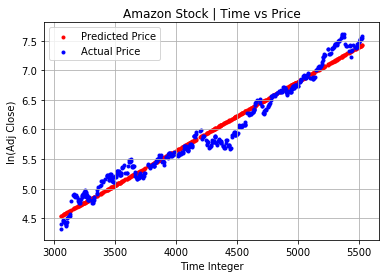

In [85]:
# Time series showing Linear regression model's predicted values and the true value for the testing data set (Transformed data)

plt.scatter(X_test, final_pred, color = 'red', label = 'Predicted Price', marker = '.')
plt.scatter(X_test, y_test, color = 'blue', label = 'Actual Price', marker = '.')
plt.title('Amazon Stock | Time vs Price')
plt.xlabel('Time Integer')
plt.ylabel('ln(Adj Close)')
plt.grid()
plt.legend()
plt.show()

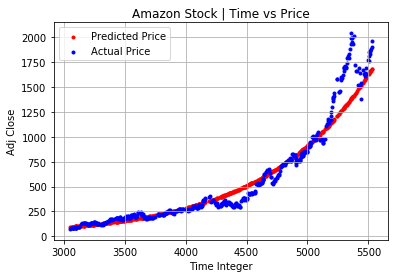

In [86]:
# Time series showing Linear regression model's predicted values and the true value for the testing data set (Original Data)

plt.scatter(X_test, np.exp(final_pred), color = 'red', label = 'Predicted Price', marker = '.')
plt.scatter(X_test, np.exp(y_test), color = 'blue', label = 'Actual Price', marker = '.')
plt.title('Amazon Stock | Time vs Price')
plt.xlabel('Time Integer')
plt.ylabel('Adj Close')
plt.grid()
plt.legend()
plt.show()

## 4. Choosing the “best” ML algorithm from #3 and #4, perform a sensitivity analysis on the effects of training % vs. testing %.

In [87]:
size_list = []
rmse_list = []
r2_list = []

for size in np.linspace(0.1, 0.9, 9):
    size_list.append(size)
    X_train, X_test, y_train, y_test = train_test_split(time, np.log(price), test_size = size, random_state = 42)
    final_model.fit(X_train, y_train)
    final_pred = final_model.predict(X_train)
    mse = mean_squared_error(np.exp(y_train), np.exp(final_pred))
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)
    r2_list.append(r2_score(np.exp(y_train), np.exp(final_pred)))
    
Sen_Analysis = pd.DataFrame()
Sen_Analysis['Test Size'] = size_list
Sen_Analysis['RMSE'] = rmse_list
Sen_Analysis['R2'] = r2_list
Sen_Analysis

,Test Size,RMSE,R2
0,0.1,128.680592,0.936810
1,0.2,127.751247,0.937559
2,0.3,128.706608,0.937348
3,0.4,129.874072,0.935541
4,0.5,131.834443,0.935279
5,0.6,130.202557,0.936683
6,0.7,132.441772,0.936300
7,0.8,130.870167,0.936809
8,0.9,133.229793,0.933372


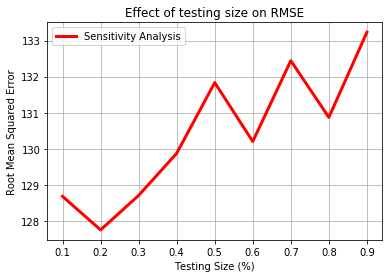

In [88]:
plt.plot(size_list, rmse_list, color = 'red', label = 'Sensitivity Analysis', linewidth = 3)
plt.title('Effect of testing size on RMSE')
plt.xlabel('Testing Size (%)')
plt.ylabel('Root Mean Squared Error')
plt.grid()
plt.legend()
plt.show()

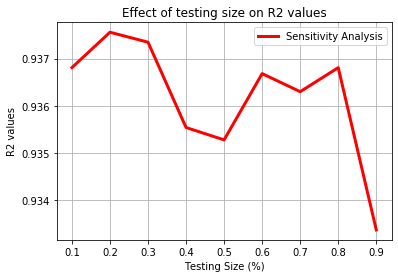

In [89]:
plt.plot(size_list, r2_list, color = 'red', label = 'Sensitivity Analysis', linewidth = 3)
plt.title('Effect of testing size on R2 values')
plt.xlabel('Testing Size (%)')
plt.ylabel('R2 values')
plt.grid()
plt.legend()
plt.show()